### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip


traitesignfip.record_microphone("noise") #Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant 1 seconde

rate, data = scipy.io.wavfile.read('enregistrement.wav')#Lecture du fichier où l'acquisition a été enregistrée 

data_right = data[:,1]
data_left = data[:,0]

#Ces deux lignes permettent de séparer les deux canaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro.
```


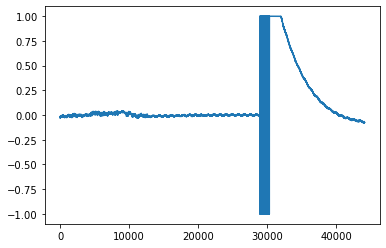

In [200]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

fs=44100
duration=5

analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
sd.wait()
digital = np.array(analog.flatten()>0,dtype=int)


plt.plot(analog)
plt.show()


[-1.         -1.         -1.         ...  0.90164185  0.90112305
  0.90115356]
[0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

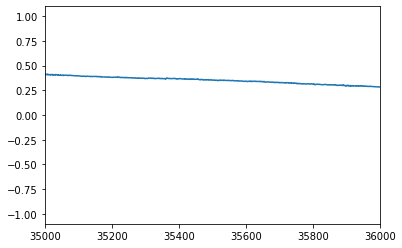

In [201]:
import comnumfip2
from importlib import reload
reload(comnumfip2)
plt.plot(analog)
plt.xlim(35000,36000)
analog_cut = [x for x in analog if (x<-0.5 or x>0.5)]
#Filtre de réception
mask = (analog<-0.9) | (analog>0.9) #On garde tout ce qui a une amplitude de plus de 0.5V
analog_test = analog[mask]
print(analog_test)
bin=comnumfip2.sample_and_threshold(analog_test,0.9)
print(bin)


def decode_nrz(bits): 
    signal = np.zeros(len(bits), dtype=np.int8) 
    for i, bit in enumerate(bits): 
        if bit == 0: 
            signal[i] = -1 
        else: 
            signal[i] = 1 
    return signal

def decode_manchester(bits):
    signal = np.zeros(2*len(bits), dtype=np.int8)
    for i, bit in enumerate(bits):
        if bit == 0:
            signal[2*i] = 1
            signal[2*i+1] = -1
        else:
            signal[2*i] = -1
            signal[2*i+1] = 1
    return signal

def decode_ami(bits):
    signal = np.zeros(len(bits), dtype=np.int8)
    last_voltage = 1
    for i, bit in enumerate(bits):
        if bit == 0:
            signal[i] = 0
        else:
            signal[i] = last_voltage
            last_voltage = -last_voltage
    return signal


def bin2ascii(bits): # Séparer les bits en groupes de 8 
    bits_str =''.join(str(bit) for bit in bits)
    bytes_list = [bits_str[i:i+8] for i in range(0, len(bits_str), 8)] # Convertir chaque groupe de 8 bits en un caractère ASCII 
    ascii_str = ''.join([chr(int(byte, 2)) for byte in bytes_list]) 
    return ascii_str


print(bin2ascii(bin))



# Code python permettant de réaliser la mesure du son

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


KeyboardInterrupt: 

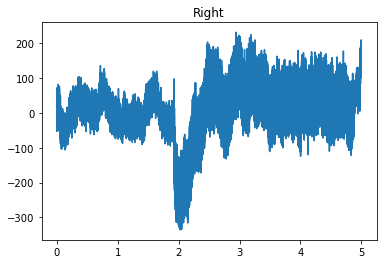

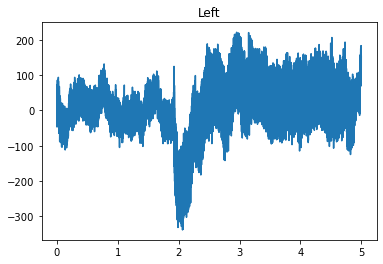

In [90]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record_microphone("noise",3)

rate, data = scipy.io.wavfile.read('enregistrement.wav')

fs = 44100 # fréquence d'échantillonage
N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 


distance=0.50


data_right = data[:,1]
data_left = data[:,0]

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

# fc = 1000 # fréquence de coupure du filtre passe-bas
# b, a = sp.signal.butter(4, fc / (fs / 2), 'low')
# data_left_filtered = sp.signal.filtfilt(b, a, data_left)
# data_right_filtered = sp.signal.filtfilt(b, a, data_right)


corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#signal X
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#signal X



# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = delta = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")
